# Desafio Análise de Dados

1. Nem todos os envolvidos estão convictos com a ideia de uma frente de BIs no BanVic. Como podemos convencer Camila Diniz, diretora comercial,  que as nossas soluções serão úteis para a empresa? Com base na análise exploratória realizada nos dados apresentados, quais perguntas de negócio podemos responder para mostrar o valor que dados possuem para a empresa? Pergunta de nível teórico. O seu projeto final não necessariamente precisa trazer os mesmos ou todos os indicadores citados nessa entrega.


2. Quais serão os indicadores ou visualizações utilizadas para responder às perguntas de negócio citadas anteriormente? Pergunta de nível teórico. O seu projeto final não necessariamente precisa trazer os mesmos ou todos os indicadores citados nessa entrega.


3. Apresentar pelo menos duas análises de negócio para cada uma das categorias. Pergunta de nível teórico. O seu projeto final não necessariamente precisa ter todas análises citadas nessa entrega: 


        Uma análise descritiva;
        Uma análise diagnóstica;
        Uma análise prescritiva;
        Uma análise preditiva.


4. Um relatório em PDF com suas análises, justificativas e raciocínio contendo os seguintes pontos:

        As respostas do item 1, 2 e 3.
        Um tópico descrevendo brevemente quais os processos de transformação e tratamento de dados foram aplicados por você.
        Um dashboard dos principais KPIs de negócio do BanVic permitindo um detalhamento por data, por agência e por clientes.
        Apresentar as análises que foram necessárias para o entendimento do negócio e que podem ser úteis no suporte para a tomada de decisão.
        E finalmente, com base nas suas análises, uma conclusão com recomendações/sugestões de negócio e encaminhamentos para a CEO do BanVic.
        Apresentar e justificar as ferramentas adotadas para a elaboração das análises.


## 1° importar as bibliotecas 

In [3]:
#importar bibliotecas
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

## 2° Importar e criar os dataframes

In [4]:
#criar as tabelas para trabalhar

agencias = pd.read_csv("data/agencias.csv")
clientes = pd.read_csv('data/clientes.csv')
colaborador_agencia = pd.read_csv('data/colaborador_agencia.csv')
colaboradores = pd.read_csv('data/colaboradores.csv')
contas = pd.read_csv('data/contas.csv')
propostas_credito = pd.read_csv('data/propostas_credito.csv')
transacoes = pd.read_csv('data/transacoes.csv')

## 3° Analisar cada um dos dataframes e transformar os dados conforme necessário

### 3.1 DataFrame 'agencias'

In [5]:
agencias.info()

print()
print(agencias.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   cod_agencia    10 non-null     int64 
 1   nome           10 non-null     object
 2   endereco       10 non-null     object
 3   cidade         10 non-null     object
 4   uf             10 non-null     object
 5   data_abertura  10 non-null     object
 6   tipo_agencia   10 non-null     object
dtypes: int64(1), object(6)
memory usage: 692.0+ bytes

   cod_agencia              nome  \
0            7   Agência Digital   
1            1    Agência Matriz   
2            2   Agência Tatuapé   
3            3  Agência Campinas   
4            4    Agência Osasco   

                                            endereco     cidade  uf  \
0  Av. Paulista, 1436 - Cerqueira César, São Paul...  São Paulo  SP   
1  Av. Paulista, 1436 - Cerqueira César, São Paul...  São Paulo  SP   
2  Praça Sílvio Romero, 15

    Os dados dos cabeçalhos se encontram de padronizados em letra minuscula e snake case. 
    O arquivo possui dez entradas e nenhuma das células apresenta valores nulos.
    É necessário alterar o tipo de dados para datetime na coluna data_abertura.

In [6]:
#transformando os dados para datetime
agencias['data_abertura'] = pd.to_datetime(agencias['data_abertura'])

#conferindo
agencias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   cod_agencia    10 non-null     int64         
 1   nome           10 non-null     object        
 2   endereco       10 non-null     object        
 3   cidade         10 non-null     object        
 4   uf             10 non-null     object        
 5   data_abertura  10 non-null     datetime64[ns]
 6   tipo_agencia   10 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 692.0+ bytes


### 3.2 DataFrame 'clientes'

In [7]:
clientes.info()
print()
print(clientes.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cod_cliente      998 non-null    int64 
 1   primeiro_nome    998 non-null    object
 2   ultimo_nome      998 non-null    object
 3   email            998 non-null    object
 4   tipo_cliente     998 non-null    object
 5   data_inclusao    998 non-null    object
 6   cpfcnpj          998 non-null    object
 7   data_nascimento  998 non-null    object
 8   endereco         998 non-null    object
 9   cep              998 non-null    object
dtypes: int64(1), object(9)
memory usage: 78.1+ KB

   cod_cliente primeiro_nome ultimo_nome                         email  \
0           28       Sabrina        Dias  moreiraemanuelly@example.org   
1          674   Luiz Felipe        Dias     pedroferreira@example.org   
2          693         Renan        Dias            ogomes@example.net   
3      

    É necessário transformar as colunas de data (data_inclusao e data_nascimento) para corresponderem ao formato datetime;
    É necessário padronizar o formato CEP para ter o traço.
    Não há células com valores nulos dentro do DataFrame 'clientes'

In [8]:
#arrumar os dados correspondentes para datetime

clientes['data_inclusao'] = pd.to_datetime(clientes['data_inclusao'])
clientes['data_nascimento'] = pd.to_datetime(clientes['data_nascimento'])


In [9]:
#Criar uma função para arrumar os dados de CEP

def formatar_cep(cep):
    if '-' not in cep:
        return f"{cep[:5]}-{cep[5:]}"
    else:
        return cep

# Aplicar a função à coluna desejada
clientes['cep'] = clientes['cep'].apply(formatar_cep)

In [10]:
#conferir se realizou a troca
print(clientes['cep'].sample(10))

561    60173-281
652    20281-879
645    72048-406
972    63334-006
55     81473-142
929    22657-163
43     25512-578
319    02265-501
104    64841-594
518    00506-259
Name: cep, dtype: object


### 3.3 DataFrame 'colaborador_agencia'

In [11]:
#conferir os dados
colaborador_agencia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   cod_colaborador  100 non-null    int64
 1   cod_agencia      100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


    O DataFrame colaborador_agencia não possui valores nulos nas células, nem valores que precisam ter seus tipos alterados.

### 3.4 DataFrame 'colaboradores'

In [12]:
#Conferindo os dados do DataFrame 'colaboradores'

colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cod_colaborador  100 non-null    int64 
 1   primeiro_nome    100 non-null    object
 2   ultimo_nome      100 non-null    object
 3   email            100 non-null    object
 4   cpf              100 non-null    object
 5   data_nascimento  100 non-null    object
 6   endereco         100 non-null    object
 7   cep              100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [13]:
#amostrar o formato de data de nascimento dos colaboradores 
print(colaboradores['data_nascimento'].sample(5))

#converter o tipo de dados para datetime

colaboradores['data_nascimento'] = pd.to_datetime(colaboradores['data_nascimento'])

41    1981-05-08
11    1975-06-15
86    1977-03-08
81    1978-07-13
17    1966-02-21
Name: data_nascimento, dtype: object


In [14]:
#alterar o nome das colunas para não confundir na hora do merge

colaboradores.rename(columns={'endereco':'endereco_colaborador',
                              'cpf':'cpf_colaborador',
                              'cep':'cep_colaborador',
                              'email':'email_colaborador',
                              'primeiro_nome':'primeiro_nome_colab',
                              'ultimo_nome':'ultimo_nome_colab',
                              'data_nascimento':'data_nascimento_colab'},inplace=True,)

In [15]:
colaboradores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   cod_colaborador        100 non-null    int64         
 1   primeiro_nome_colab    100 non-null    object        
 2   ultimo_nome_colab      100 non-null    object        
 3   email_colaborador      100 non-null    object        
 4   cpf_colaborador        100 non-null    object        
 5   data_nascimento_colab  100 non-null    datetime64[ns]
 6   endereco_colaborador   100 non-null    object        
 7   cep_colaborador        100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 6.4+ KB


    O DataFrame 'colaboradores' não possui valores nulos e foi necessário alterar o tipo de dados do campo data_nascimento para datetime.

### 3.5 DataFrame 'contas'

In [16]:
#entender os dados do DataFrame 'contas'

contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   num_conta               999 non-null    int64  
 1   cod_cliente             999 non-null    int64  
 2   cod_agencia             999 non-null    int64  
 3   cod_colaborador         999 non-null    int64  
 4   tipo_conta              999 non-null    object 
 5   data_abertura           999 non-null    object 
 6   saldo_total             999 non-null    float64
 7   saldo_disponivel        999 non-null    float64
 8   data_ultimo_lancamento  999 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 70.4+ KB


In [17]:
print(contas[['data_abertura','data_ultimo_lancamento']].sample(5))

               data_abertura          data_ultimo_lancamento
86   2017-04-20 14:07:00 UTC         2022-09-20 20:09:54 UTC
408  2018-05-03 15:18:00 UTC         2022-12-27 06:03:23 UTC
751  2018-02-19 11:29:00 UTC         2019-12-04 08:10:57 UTC
757  2017-01-06 14:34:00 UTC         2022-12-13 01:27:39 UTC
857  2022-04-07 14:35:00 UTC  2022-12-29 23:59:59.153504 UTC


In [18]:
#transformar as colunas de data para o formato datetime
contas['data_abertura'] = pd.to_datetime(contas['data_abertura'])

In [19]:
contas['data_ultimo_lancamento'] = pd.to_datetime(contas['data_ultimo_lancamento'], format='mixed')

### 3.6 DataFrame 'propostas_credito'

In [20]:
#entendendo os dados do DataFrame propostas_credito

propostas_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cod_proposta           2000 non-null   int64  
 1   cod_cliente            2000 non-null   int64  
 2   cod_colaborador        2000 non-null   int64  
 3   data_entrada_proposta  2000 non-null   object 
 4   taxa_juros_mensal      2000 non-null   float64
 5   valor_proposta         2000 non-null   float64
 6   valor_financiamento    2000 non-null   float64
 7   valor_entrada          2000 non-null   float64
 8   valor_prestacao        2000 non-null   float64
 9   quantidade_parcelas    2000 non-null   int64  
 10  carencia               2000 non-null   int64  
 11  status_proposta        2000 non-null   object 
dtypes: float64(5), int64(5), object(2)
memory usage: 187.6+ KB


In [21]:
#transformar os dados para o formato datetime da coluna 'data_entrada_proposta'
propostas_credito['data_entrada_proposta'] = pd.to_datetime(propostas_credito['data_entrada_proposta'])

    O dataframe 'propostas_credito' não possui valores nulos e preciso que a coluna 'data_entrada_proposta' tivesse seu valor alterado para o formato datetime.

### 3.7 DataFrame 'transacoes'


In [22]:
#entender os dados do DataFrame 'transacoes'
transacoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cod_transacao    71999 non-null  int64  
 1   num_conta        71999 non-null  int64  
 2   data_transacao   71999 non-null  object 
 3   nome_transacao   71999 non-null  object 
 4   valor_transacao  71999 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.7+ MB


In [23]:
#transformar a coluna 'data_transacao' para o formato datetime

transacoes['data_transacao'] = pd.to_datetime(transacoes['data_transacao'], format='mixed')

## 4° Usando esses dados

 - Perguntas para responder
      - transações financeiras
      - comportamento dos clientes em diversos canais
      - como o PIX afetou as transações
      - identificar padrões de inatividade
      - avaliar a popularidade da agência digital em comparação com a agência física
      - o BanVic pode investir mais em marketing  e melhorar a segmentação dos clientes nas cidades que o banco já está estabelecido
          - Quanto capital os novos bancos trouxeram?

- Nem todos os envolvidos estão convictos com a ideia de uma frente de BIs no BanVic. Como podemos convencer Camila Diniz, diretora comercial,  que as nossas soluções serão úteis para a empresa? Com base na análise exploratória realizada nos dados apresentados, quais perguntas de negócio podemos responder para mostrar o valor que dados possuem para a empresa?

- Quais serão os indicadores ou visualizações utilizadas para responder às perguntas de negócio citadas anteriormente? 

- Apresentar pelo menos duas análises de negócio para cada uma das categorias.
    - Uma análise descritiva;
    - Uma análise diagnóstica;
    - Uma análise prescritiva;
    - Uma análise preditiva

### 4.1 Perfil do cliente

In [24]:
#tipo de contas dos usuários

tipo_de_conta = contas['tipo_conta'].value_counts()

print(tipo_de_conta)

tipo_conta
PF    999
Name: count, dtype: int64


Conclusão
- Todas as contas do banco são de pessoa física.

In [25]:
print(agencias[['cod_agencia','nome']].sort_values(by='cod_agencia'))

   cod_agencia                    nome
1            1          Agência Matriz
2            2         Agência Tatuapé
3            3        Agência Campinas
4            4          Agência Osasco
5            5    Agência Porto Alegre
6            6  Agência Rio de Janeiro
0            7         Agência Digital
7            8         Agência Jardins
8            9   Agência Florianópolis
9           10          Agência Recife


Text(0.5, 1.0, 'Saldo total por agência')

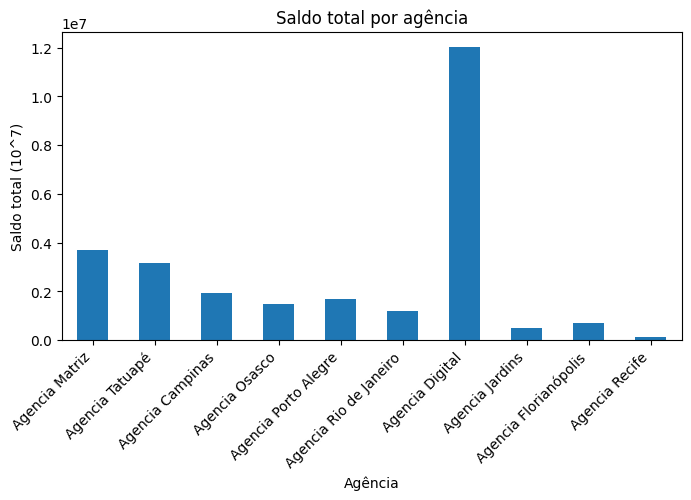

In [26]:
#Qual o saldo total por agência?
saldo_total_por_agencia = contas.groupby('cod_agencia')['saldo_total'].sum()

nome_agencias = ['Agencia Matriz', 'Agencia Tatuapé','Agencia Campinas','Agencia Osasco','Agencia Porto Alegre','Agencia Rio de Janeiro','Agencia Digital','Agencia Jardins','Agencia Florianópolis','Agencia Recife']

plt.figure(figsize=[8,4])
saldo_total_por_agencia.plot(kind='bar')
plt.ylabel("Saldo total (10^7)")
plt.xlabel('Agência')
plt.xticks(range(len(nome_agencias)), nome_agencias, rotation=45, ha='right')
plt.title('Saldo total por agência')


Text(0.5, 1.0, 'Clientes por agência')

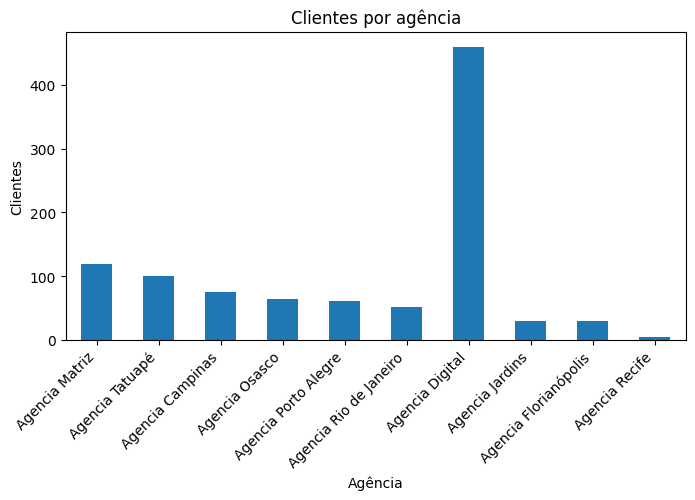

In [27]:
#Quantos clientes por agência?
clientes_por_agencia = contas.groupby('cod_agencia')['cod_cliente'].count()
plt.figure(figsize=[8,4])
clientes_por_agencia.plot(kind='bar')
plt.ylabel("Clientes")
plt.xlabel('Agência')
plt.xticks(range(len(nome_agencias)), nome_agencias, rotation=45, ha='right')
plt.title('Clientes por agência')


Text(0.5, 1.0, 'Saldo médio por agência')

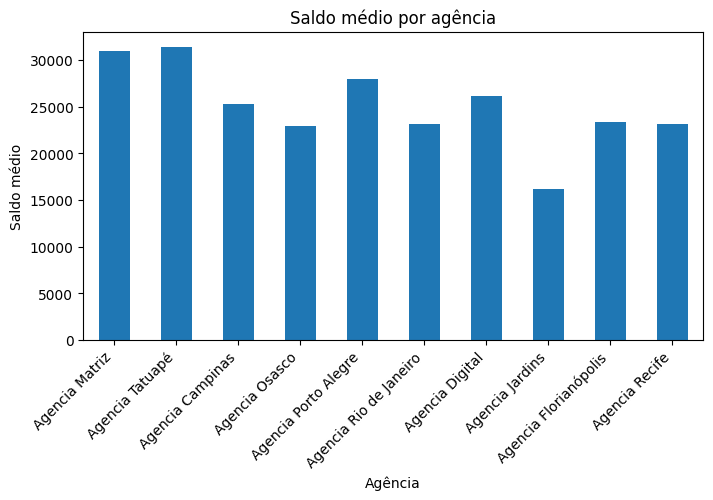

In [28]:
#Qual o aldo médio por agência?
saldo_medio_por_agencia = contas.groupby('cod_agencia')['saldo_total'].mean()
plt.figure(figsize=[8,4])
saldo_medio_por_agencia.plot(kind='bar')
plt.ylabel("Saldo médio")
plt.xlabel('Agência')
plt.xticks(range(len(nome_agencias)), nome_agencias, rotation=45, ha='right')
plt.title('Saldo médio por agência')

Conclusão

- É possível averiguar que a agencia digital é a que possui o maior número de clientes, assim como o maior saldo. Entretando, ao avaliar o saldo médio por agência, temos as agências Matriz e Tatuapé como com maior saldo médio.

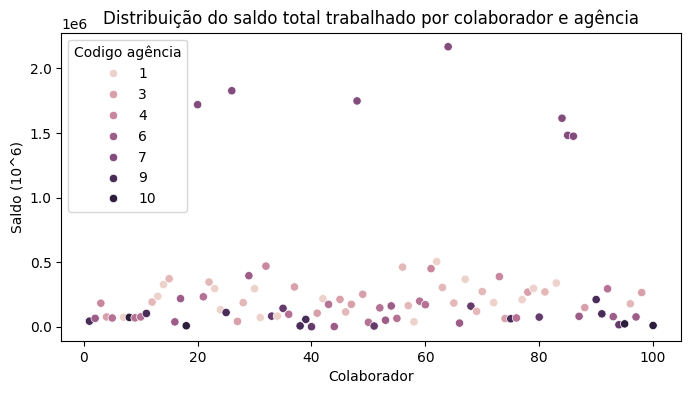

In [29]:
#Qual o saldo movimentado por colaborador?

saldo_por_colaborador_agencia = contas.groupby(['cod_colaborador', 'cod_agencia'])['saldo_total'].sum().reset_index()

plt.figure(figsize=[8,4])
sns.scatterplot(x='cod_colaborador', y='saldo_total', hue='cod_agencia', data=saldo_por_colaborador_agencia)
plt.title('Distribuição do saldo total trabalhado por colaborador e agência')
plt.xlabel('Colaborador')
plt.xticks(rotation=0)
plt.ylabel("Saldo (10^6)")
plt.legend(title='Codigo agência')


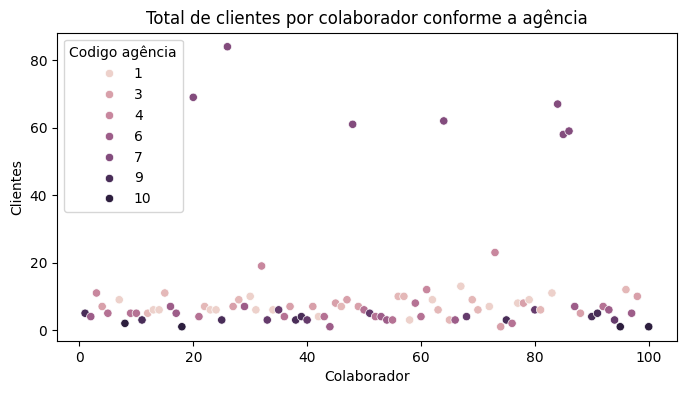

In [30]:
#quantos clientes cada colaborador tem?

clientes_por_colaborador = contas.groupby(['cod_colaborador','cod_agencia'])['cod_cliente'].count().reset_index()

plt.figure(figsize=[8,4])
sns.scatterplot(x='cod_colaborador', y='cod_cliente', hue='cod_agencia', data=clientes_por_colaborador)
plt.title("Total de clientes por colaborador conforme a agência")
plt.xlabel('Colaborador')
plt.ylabel('Clientes')
plt.legend(title='Codigo agência')

Conclusão

- Temos 7 colaboradores dentre todas as agências que trabalham com saldos acima de um milhão de reais.
    - Sendo que a maioria dos colaboradores trabalha com saldos até quinhentos mil reais
- Também temos 7 colaboradores com mais de 50 clientes.
    - Onde a maioria dos colaboradores tem até 20 clientes.


### 4.2 Transações

In [31]:
#criar coluna de data, ano, mês, dia e dia da semana no DataFrame 'trasacoes'
transacoes['data'] = transacoes['data_transacao'].dt.date
transacoes['year'] = transacoes['data_transacao'].dt.year
transacoes['month'] = transacoes['data_transacao'].dt.month
transacoes['day'] = transacoes['data_transacao'].dt.day
transacoes['day_of_week'] = transacoes['data_transacao'].dt.day_of_week

#### 4.2.1 Quais tipos de transações foram realizadas por agência?

In [32]:
#primeiro, unir os dataframes 'transacoes' e 'contas' para tirar devinir as transações por agência

transacoes_e_contas = pd.merge(contas, transacoes[['num_conta','nome_transacao']], on='num_conta')

transacoes_e_contas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71999 entries, 0 to 71998
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   num_conta               71999 non-null  int64              
 1   cod_cliente             71999 non-null  int64              
 2   cod_agencia             71999 non-null  int64              
 3   cod_colaborador         71999 non-null  int64              
 4   tipo_conta              71999 non-null  object             
 5   data_abertura           71999 non-null  datetime64[ns, UTC]
 6   saldo_total             71999 non-null  float64            
 7   saldo_disponivel        71999 non-null  float64            
 8   data_ultimo_lancamento  71999 non-null  datetime64[ns, UTC]
 9   nome_transacao          71999 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(2), int64(4), object(2)
memory usage: 5.5+ MB


<Axes: xlabel='nome_transacao'>

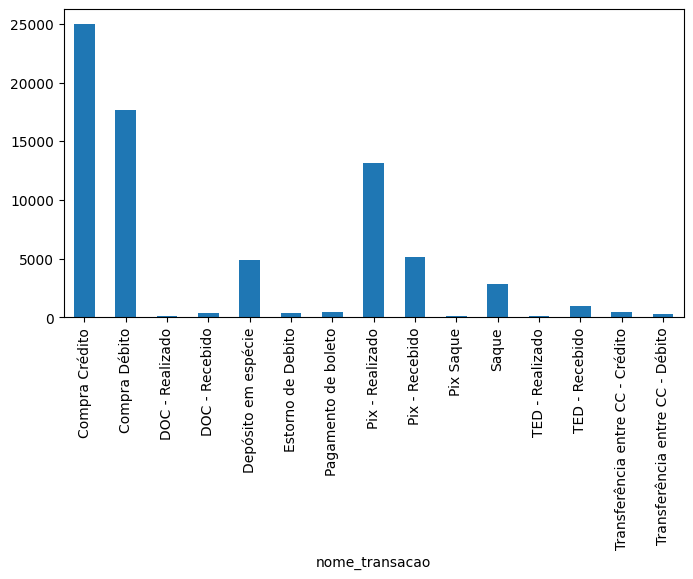

In [33]:
transacoes_por_agencia = transacoes_e_contas.groupby('nome_transacao')['cod_agencia'].count()

plt.figure(figsize=[8,4])
transacoes_por_agencia.plot(kind='bar')


<Axes: xlabel='status_proposta'>

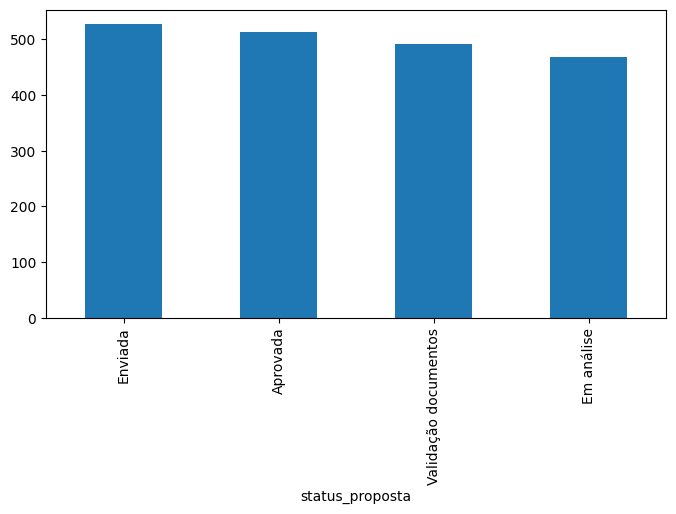

In [34]:
propostas_de_financiamento = propostas_credito['status_proposta'].value_counts()

plt.figure(figsize=[8,4])
propostas_de_financiamento.plot(kind='bar')

In [35]:
#Quais tipos de transações foram realizadas por canal?